In [ ]:
!pip install tensorflow scikeras scikit-learn

In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
pip install flatten-json

In [ ]:
pip install early-stopping

In [ ]:
pip install callbacks

  Preparing metadata (setup.py) ... done
  Created wheel for callbacks: filename=callbacks-0.3.0-py3-none-any.whl size=5658 sha256=62754e7b8e8e59996b8d8ddf636533f248e5094aac527ead2e067b02c600e04d
  Stored in directory: /root/.cache/pip/wheels/bf/f3/9f/df52405b397996d24652af7e9ac37d417da34abe7b691f13cb
Successfully built callbacks


In [ ]:
import os
import math
import json
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.framework import ops
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import BatchNormalization

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

os.environ['PYTHONHASHSEED']= str(123)
np.random.seed(123)
random.seed(123)

In [ ]:
path="/content/Cancer_Data.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
lb = LabelEncoder()
df['diagnosis'] = lb.fit_transform(df['diagnosis'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,SOURCE
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


In [ ]:
df = df.drop(labels="Unnamed: 32", axis=1)
df = df.drop(labels="id", axis=1)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,SOURCE
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [ ]:
feature_columns = df.iloc[:,1:-1]
predicted_class = df.iloc[:,0]

In [ ]:
feature_columns

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
predicted_class

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
predicted_class.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

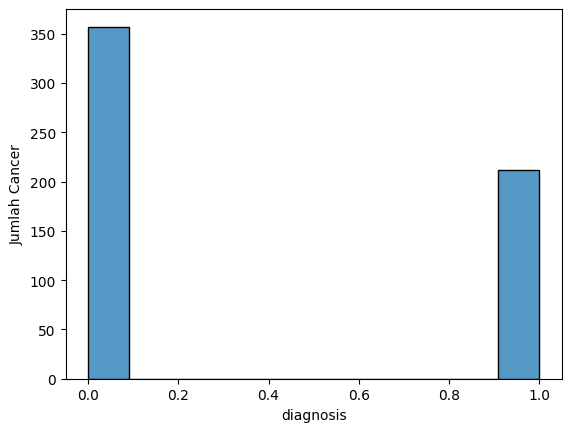

In [ ]:
import seaborn as sns

fig = plt.subplots()
sns.histplot(data=predicted_class)
plt.ylabel("Jumlah Cancer")
plt.show()

In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
SOURCE                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_columns, predicted_class,
                                                    test_size = 0.20, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [ ]:
model1 = Sequential()
model1.add(LSTM(units = 128, input_shape=(x_train.shape[1],1), activation='tanh', return_sequences = False))
model1.add(Dense(128, activation='sigmoid')),BatchNormalization()
model1.add(Dense(1, activation='sigmoid')),BatchNormalization()

 # Compile model
model1.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
%%time
from keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(monitor = "val_accuracy", verbose = 1, mode = 'max', patience = 20)

# Fit Model
fit_model1= model1.fit(x_train, y_train, epochs = 200, batch_size = 64, validation_data = (x_test,y_test), verbose = 1, callbacks = [earlyStop])

Epoch 1/200
8/8 [==============================] - 8s 157ms/step - loss: 0.6625 - accuracy: 0.6286 - val_loss: 0.6559 - val_accuracy: 0.6228
Epoch 2/200
8/8 [==============================] - 0s 55ms/step - loss: 0.6474 - accuracy: 0.6286 - val_loss: 0.6295 - val_accuracy: 0.6228
Epoch 3/200
8/8 [==============================] - 0s 57ms/step - loss: 0.5911 - accuracy: 0.6681 - val_loss: 0.6330 - val_accuracy: 0.5526
Epoch 4/200
8/8 [==============================] - 0s 59ms/step - loss: 0.4426 - accuracy: 0.8066 - val_loss: 0.2344 - val_accuracy: 0.9386
Epoch 5/200
8/8 [==============================] - 0s 59ms/step - loss: 0.3903 - accuracy: 0.8571 - val_loss: 0.2067 - val_accuracy: 0.9474
Epoch 6/200
8/8 [==============================] - 0s 59ms/step - loss: 0.4382 - accuracy: 0.8176 - val_loss: 0.3123 - val_accuracy: 0.9474
Epoch 7/200
8/8 [==============================] - 0s 58ms/step - loss: 0.3392 - accuracy: 0.8835 - val_loss: 0.2373 - val_accuracy: 0.9298
Epoch 8/200
8/8 [==

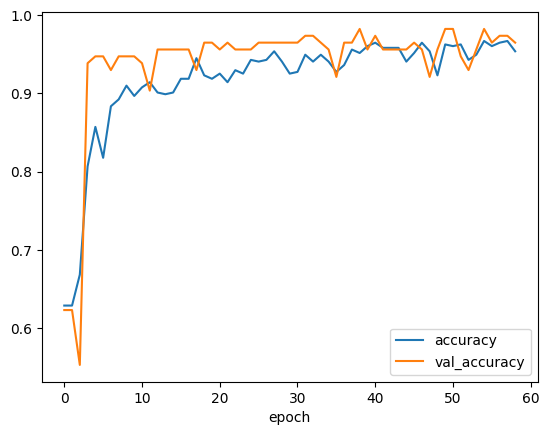

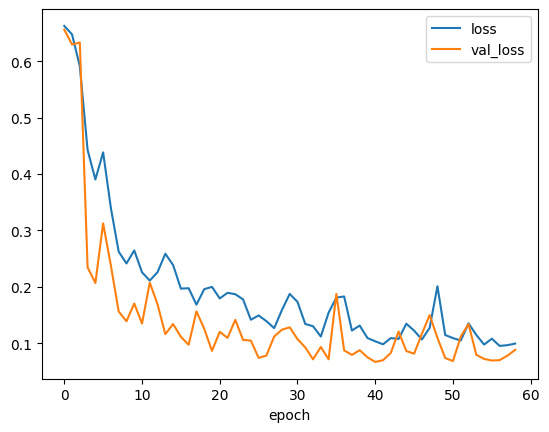

4/4 [==============================] - 0s 28ms/step - loss: 0.0882 - accuracy: 0.9649
accuracy 96.49122953414917
4/4 [==============================] - 1s 25ms/step
CPU times: user 1.7 s, sys: 153 ms, total: 1.85 s
Wall time: 1.89 s


In [ ]:
# Visualization Loss and Accuracy
%%time
def plot_graph(history, string):
  plt.plot(fit_model1.history[string])
  plt.plot(fit_model1.history['val_'+string])
  plt.xlabel(string)
  plt.xlabel('epoch')
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(fit_model1, 'accuracy')
plot_graph(fit_model1, 'loss')

#evaluate on validatin set
scores1 = model1.evaluate(x_test, y_test)
print(model1.metrics_names[1], scores1[1]*100)
prediction1 = model1.predict(x_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix : 


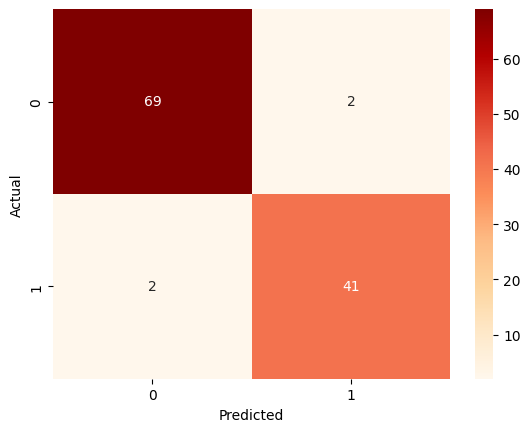

CPU times: user 351 ms, sys: 40.7 ms, total: 392 ms
Wall time: 448 ms


In [ ]:
%%time
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, prediction1.round()))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

cm1 = confusion_matrix(y_test, prediction1.round())
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm1, cmap = 'OrRd',annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

In [ ]:
print(y_test.round())

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64


In [ ]:
import numpy

In [ ]:
gabungan1= numpy.column_stack([y_test,prediction1.round()])

In [ ]:
gabungan1

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.

PERCOBAAN 2 (70%)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_columns, predicted_class,
                                                    test_size = 0.30, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


# HYPERTUNING

# BATAS

In [ ]:
model1 = Sequential()
model1.add(LSTM(units = 128, input_shape=(x_train.shape[1],1), activation='tanh', return_sequences = False))
model1.add(Dense(128, activation='sigmoid')),BatchNormalization()
model1.add(Dense(1, activation='sigmoid')),BatchNormalization()

 # Compile model
model1.compile(loss = 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
%%time
from keras.callbacks import EarlyStopping

earlyStop = EarlyStopping(monitor = "val_accuracy", verbose = 1, mode = 'max', patience = 20)

# Fit Model
fit_model1= model1.fit(x_train, y_train, epochs = 200, batch_size = 64, validation_data = (x_test,y_test), verbose = 1, callbacks = [earlyStop])

Epoch 1/200
7/7 [==============================] - 5s 224ms/step - loss: 0.6648 - accuracy: 0.6256 - val_loss: 0.6520 - val_accuracy: 0.6316
Epoch 2/200
7/7 [==============================] - 1s 119ms/step - loss: 0.6710 - accuracy: 0.6256 - val_loss: 0.6520 - val_accuracy: 0.6316
Epoch 3/200
7/7 [==============================] - 1s 112ms/step - loss: 0.6529 - accuracy: 0.6256 - val_loss: 0.6480 - val_accuracy: 0.6316
Epoch 4/200
7/7 [==============================] - 1s 97ms/step - loss: 0.6491 - accuracy: 0.6256 - val_loss: 0.6113 - val_accuracy: 0.6316
Epoch 5/200
7/7 [==============================] - 0s 62ms/step - loss: 0.5964 - accuracy: 0.6307 - val_loss: 0.4849 - val_accuracy: 0.9006
Epoch 6/200
7/7 [==============================] - 0s 62ms/step - loss: 0.4309 - accuracy: 0.8744 - val_loss: 0.3985 - val_accuracy: 0.8187
Epoch 7/200
7/7 [==============================] - 0s 68ms/step - loss: 0.3971 - accuracy: 0.8442 - val_loss: 0.2750 - val_accuracy: 0.8947
Epoch 8/200
7/7 [

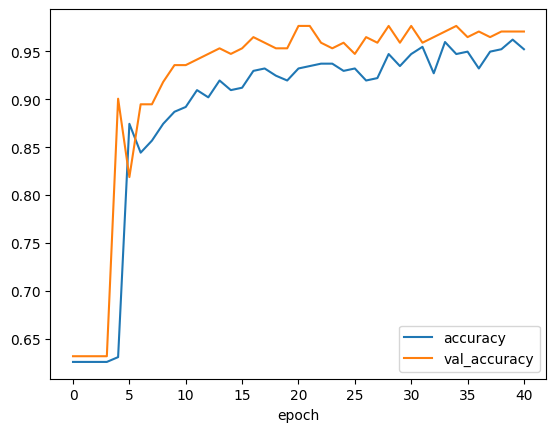

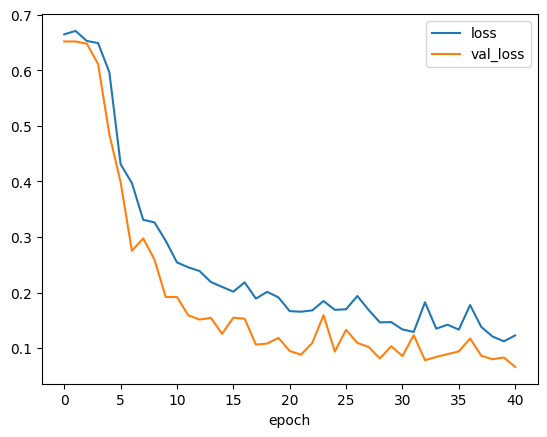

6/6 [==============================] - 0s 14ms/step - loss: 0.0660 - accuracy: 0.9708
accuracy 97.07602262496948
6/6 [==============================] - 0s 15ms/step
CPU times: user 923 ms, sys: 222 ms, total: 1.15 s
Wall time: 913 ms


In [ ]:
# Visualization Loss and Accuracy
%%time
def plot_graph(history, string):
  plt.plot(fit_model1.history[string])
  plt.plot(fit_model1.history['val_'+string])
  plt.xlabel(string)
  plt.xlabel('epoch')
  plt.legend([string, "val_"+string])
  plt.show()

plot_graph(fit_model1, 'accuracy')
plot_graph(fit_model1, 'loss')

#evaluate on validatin set
scores1 = model1.evaluate(x_test, y_test)
print(model1.metrics_names[1], scores1[1]*100)
prediction1 = model1.predict(x_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion Matrix : 


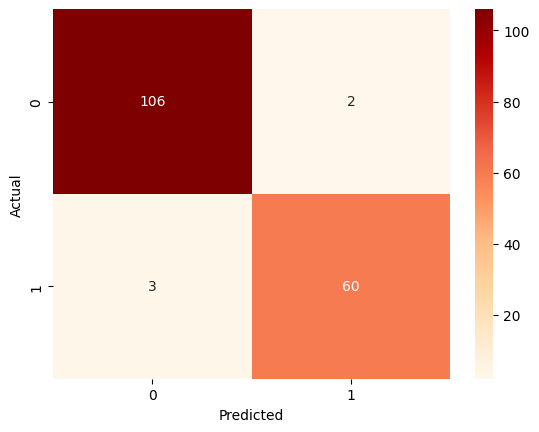

CPU times: user 340 ms, sys: 53.6 ms, total: 393 ms
Wall time: 661 ms


In [ ]:
%%time
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, prediction1.round()))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

cm1 = confusion_matrix(y_test, prediction1.round())
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm1, cmap = 'OrRd',annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()